# <center> Segmentation of online gift store customers

## Problem statement


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>


Marketing is an integral part of any business. To increase a company's profit, it is important to understand your client, their wishes and preferences. With the advent of e-commerce, or online selling, it has become much easier to collect customer data, analyze it, find patterns in it and implement marketing campaigns.

Most online stores use web analytics tools to track page views, visitor volume and behavior, and bounce rates. But a report from Google Analytics or a similar system may not be enough to fully understand how customers interact with the website. It is important for companies to be able to quickly and accurately respond to changes in customer behavior by creating tools that detect these changes in near real time.

Machine learning helps the search engine analyze a huge amount of data about platform visitors, recognize behavior patterns of professional buyers, determine the category of customers (for example, loyal/promising/newbies/gone/etc) and choose the right strategy for interacting with them.

It is also worth noting that companies using machine learning on their e-commerce platforms can constantly improve the efficiency of business processes: customize the product selection for each customer, offer a favorable price in accordance with the client's budget, etc.

> Typically, e-commerce datasets are proprietary and therefore difficult to find among publicly available data. However [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has created a dataset containing actual transactions for 2010 and 2011, which is what we are asked to work with in this case.

> We have a dataset that contains all transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based online retailer. The company primarily sells unique gifts for all occasions. Many of the company's customers are wholesalers.


**Business task:** segment existing clients, interpret these segments and determine a strategy for interacting with them.

**Technical task:** build a model of customer clustering based on their purchasing power, order frequency and the time since their last purchase, and determine the profile of each cluster.

**Main Project Goals:**
1. Pre-process the original transaction dataset.
2. Conduct an exploratory data analysis and identify key patterns.
3. Create a dataset of characteristics of each unique customer.
4. Build multiple machine learning models to solve the customer clustering problem, determine the number of clusters, and interpret them.
5. Design a process for predicting the customer interest category and test the model on new customers.



## Data and its description

The data is given as a table in CSV format, with each row containing information about a unique transaction.

Features describing each transaction:

* InvoiceNo — a unique nominal six-digit number assigned to each transaction; the letter "C" at the beginning of the code indicates the cancellation of the transaction;
* StockCode — a unique five-digit integer assigned to each individual product;
* Description — the name of the product;
* Quantity — quantity of each item per transaction;
* InvoiceDate — date and time of invoice/transaction;
* UnitPrice — unit price in pounds sterling;
* CustomerID — a unique five-digit number uniquely assigned to each customer
* Country — the name of the country in which the customer resides.


Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Introduction to data structure

First things first, we need to understand what data we're working with and perform some basic data preprocessing - convert the features into the formats necessary for further work.

Let's take a closer look at the data. We will: 

* Find out how many unique clients made transactions during the specified period;
* Find out from which countries the transactions were made;
* Examine the data for missing values and duplicates;
* Convert the columns to the correct formats (for example, dates to datetime format);
* Carry out a statistical analysis of the source data, looking at the main ranges of the features.

In [2]:
data = pd.read_csv(
    "data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [4]:
# number of unique customers
print(f'Number of unique customers: {data["CustomerID"].nunique()}') 

Number of unique customers: 4372


In [5]:
# number of unique countries
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [6]:
# missing values
print(f'Total number of missing values: {data.isnull().sum().sum()}') 

Total number of missing values: 136534


In [7]:
# duplicates
print(f'Total number of duplicates: {data.duplicated().sum()}') 

Total number of duplicates: 5268


In [8]:
# converting InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [9]:
# data stats
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


## 2. Data transformation, cleaning and EDA

### 2.1. Pre-processing the transaction data

#### 2.1.1 Missing values

Missing values in the Customer ID and product description columns indicate incorrect/incomplete transactions. It's better if we remove them from our data.

**Note:** If we look at the distribution of the missing values in the Description and CustomerID columns, we will notice that just by deleting rows containing missing values in the CustomerID column, the rows containing missing values in the Description column are automatically deleted.


In [10]:
data_missing = data[data['Description'].isnull()]
data_missing[['CustomerID', 'Description']].head()

,CustomerID,Description
622,NaN,NaN
1970,NaN,NaN
1971,NaN,NaN
1972,NaN,NaN
1987,NaN,NaN


In [11]:
data = data.dropna(subset=["CustomerID"])

#### 2.1.2. Dublicates

As we have already noticed, the data contains dublicates. Let's remove them from the dataset.


In [12]:
print(f'Total number of duplicates: {data.duplicated().sum()}') 

Total number of duplicates: 5225


In [13]:
data = data.drop_duplicates()

#### 2.1.3. Transactions with negative quantity of goods

From the data insights above, we learned all the specifics of order cancellations. When we will segment customers, we will be determining their purchasing power. When calculating purchasing power, it will be very important for us to take into account the returns of a particular customer.

To calculate the number of returns, we first need to determine how many unique products are indicated in the transaction (cart) for each unique customer-order pair:


In [14]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Note:** Over 16% of unique orders are returns. Interesting fact: if we counted the number of transactions containing a return sign in the original table, where a separate line was created for each unique product, then we would get that the number of returns is less than 1%. However, this number would be incorrect.

Let's create a `QuantityCancelled` feature in our transaction data. This feature will indicate the number of subsequently cancelled orders for each transaction for which there is an opposite transaction with a return. For transactions for which there were no returns, the attribute will be equal to 0. For transactions for which a negative quantity of goods is specified, but there is no counterparty in the data, the attribute will be empty.

For this we have prepared the `get_quantity_cancelled()` function. This function takes as input a table with transactions and returns a `Series` object - a column that indicates the number of subsequently cancelled goods for each transaction. If a transaction does not have a counterparty, this attribute is marked as `NaN`.

Note that this function does not account for the difficult case where the quantity of the cancelled item in the return transaction is greater than the quantity of the item specified in any of the individual purchase transactions (this is the case when a customer has made multiple orders for the same item and then issued a return for all of the items at once).

*Caution! Finding cancelled transactions takes a long time due to the large number of rows in the table. The following code may take up to 20 minutes to run, depending on your computer's speed.*

In [15]:
def get_quantity_cancelled(data):
    """Function for creating a feature for the number of cancelled items.

    The function takes a dataset as input and returns a column that indicates the number of subsequently cancelled items for each transaction.
    If a transaction with a negative quantity of items does not have a counterparty, this flag is marked as NaN.

    Args:
        data (DataFrame): a dataset of transactions
    Returns:
        Series: a column with a number of cancelled items
    """
    # Initialize a Series with zeros and the same length as the table columns.
    quantity_cancelled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Create a DataFrame from all counterparties
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # The return transaction has no counterparty
        # We do nothing
        if (df_test.shape[0] == 0): 
            # Mark the flag as NaN
            quantity_cancelled.loc[index] = np.nan
        # The return transaction has only one counterparty
        # We add the quantity of the cancelled product to the QuantityCancelled column
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_cancelled.loc[index_order] = -col['Quantity']       
        # The return transaction has multiple counterparties
        # We set the quantity of the cancelled product in the QuantityCancelled column for the purchase transaction 
        # in which the quantity of the product is greater than the quantity of the product in the return transaction.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_cancelled.loc[ind] = -col['Quantity']
                break    
    return quantity_cancelled

data['QuantityCancelled'] = get_quantity_cancelled(data)

*Caution! Finding cancelled transactions takes a long time due to the large number of rows in the table. The following code may take up to 20 minutes to run, depending on your computer's speed.*

Let's find out how many return transactions in the data have no counterparties, and if their number is insignificant, remove them from the data.

Once we've dealt with returns, we'll remove transactions with negative quantities of goods - we don't need them anymore.


In [16]:
print(f'Number of return transactions with no counterparty: {data["QuantityCancelled"].isnull().sum()}') 

Number of return transactions with no counterparty: 1303


In [17]:
data = data.dropna(subset=['QuantityCancelled'])

In [18]:
data = data[data['Quantity'] > 0]

#### 2.1.4. Specialized transactions

The next task is to process special types of transactions that are marked by Latin letters.

There are six special types of transactions in the data. Using regular expressions, we will find such product codes (StockCode) that begin with Latin letters (the codes may contain numbers).

To understand what these codes mean, we can look at the Description column, for example POST means postage, C2 means shipping costs, BANK CHARGES means bank charges.

Special transactions do not characterize the purchasing power of customers, since they are not directly related to their purchases, so we do not need such records. Thus, we will remove all special transactions from the table.

In [19]:
special_transactions = data[data['StockCode'].str.contains(r'^[a-zA-Z]+', regex=True)]
print(special_transactions[['StockCode', 'Description']].drop_duplicates())


           StockCode                 Description
45              POST                     POSTAGE
1423              C2                    CARRIAGE
2239               M                      Manual
4406    BANK CHARGES                Bank Charges
157195          PADS  PADS TO MATCH ALL CUSHIONS
317507           DOT              DOTCOM POSTAGE


In [20]:
data = data.drop(special_transactions.index, axis=0)

#### 2.1.5. Transactions with items without cost

In [21]:
data['UnitPrice'].describe()

count    391183.000000
mean          2.874130
std           4.284639
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

When looking at the descriptive statistics, we can notice that some items are priced at £0. There are less than 1% of such transactions, hence we can remove them.

In [22]:
data = data[data['UnitPrice'] > 0]
print(data.shape)

(391150, 9)


#### 2.1.6. Total value of goods in the transaction

Let's add the total price of the order (TotalPrice) to our dataset. It is calculated as:

**total price = unit price * (number of items in the order - number of returned items).**

This feature will later help us calculate the purchasing power of each customer.

In [23]:
data['TotalPrice'] = (data['Quantity'] - data['QuantityCancelled'].fillna(0)) * data['UnitPrice']

#### 2.1.7 Number of unique items in the order

This feature will help us in analyzing customer behavior (for example, which customers buy many different products).

In [24]:
unique_items_per_order = data.groupby('InvoiceNo')['StockCode'].nunique()
data = data.merge(unique_items_per_order.rename('UniqueItemsInOrder'), on='InvoiceNo')

#### 2.1.8 Time of purchase

It is possible that different customers have preferences regarding the time of purchase. Let's extract the month, day of the week and hour attributes from the invoice date column:

In [25]:
data['Month'] = data['InvoiceDate'].dt.to_period('M') # month
data['Weekday'] = data['InvoiceDate'].dt.day_name()  # day of the week
data['Hour'] = data['InvoiceDate'].dt.hour  # hour

#### 2.1.9 Wholesale customers indicator

We can assume that customers who make large orders (e.g. more than 15 items) are wholesalers.

In [26]:
data['IsWholesale'] = (data['Quantity'] >= 15).astype(int)

Now we can save the result so we don't have to repeat the preprocessing:

In [27]:
data.to_csv('data/cleaned_transactions.csv', index=False)

### 2.2. Exploratory data analysis

Once the pre-processing is done, it's time to conduct an exploratory data analysis!

* Customers from which countries buy more and more often?
* Which countries bring in the most seasonal revenue?
* Is there a seasonality in sales (when do people order more often)?
* How do sales fluctuate over days of the week?
* What is the distribution of the average number of daily orders by time of day (hour of transaction)?
* Who are the most valuable customers?
* What is the distribution of average order values (AOV)?
* Which products are returned the most?

In [28]:
data = pd.read_csv('data/cleaned_transactions.csv')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391150 entries, 0 to 391149
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           391150 non-null  int64         
 1   StockCode           391150 non-null  object        
 2   Description         391150 non-null  object        
 3   Quantity            391150 non-null  int64         
 4   InvoiceDate         391150 non-null  datetime64[ns]
 5   UnitPrice           391150 non-null  float64       
 6   CustomerID          391150 non-null  int64         
 7   Country             391150 non-null  object        
 8   QuantityCancelled   391150 non-null  float64       
 9   TotalPrice          391150 non-null  float64       
 10  UniqueItemsInOrder  391150 non-null  int64         
 11  Month               391150 non-null  object        
 12  Weekday             391150 non-null  object        
 13  Hour                391150 no

#### 2.2.1 Top Buying Countries

Let's identify countries with the highest total revenue and order frequency.

In [30]:
country_stats = data.groupby('Country').agg({'TotalPrice': 'sum', 'InvoiceNo': 'nunique'}).reset_index()
country_stats = country_stats.sort_values(by='TotalPrice', ascending=False).head(10)

In [31]:
fig = px.bar(
    country_stats, 
    x='Country', 
    y='TotalPrice', 
    text='TotalPrice', 
    title='Top 10 Countries by Total Revenue',
    labels={'TotalPrice': 'Total Revenue (£)', 'Country': 'Country'},
    color='TotalPrice', 
    color_continuous_scale='rdbu'
)
fig.show()

The United Kingdom overwhelmingly dominates in total revenue (~£6.8M), far exceeding other countries.
The next highest contributors are Netherlands, Ireland (EIRE), Germany, and France, but their revenues are significantly lower, staying below £300K.
This suggests that the majority of purchases happen in the UK, likely due to logistics, business presence, or target audience concentration.

#### 2.2.2 Seasonality of Revenue

<Axes: title={'center': 'Monthly Revenue'}, xlabel='Month'>

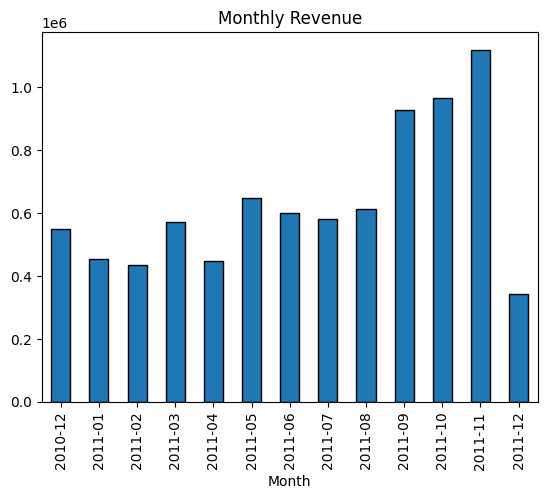

In [32]:
monthly_sales = data.groupby('Month')['TotalPrice'].sum()
monthly_sales.plot(kind='bar', title='Monthly Revenue')

Revenue is relatively stable throughout most of the year, with a gradual increase from summer (June–August).
A sharp increase occurs from September to November, peaking in November 2011.
A significant drop in December 2011 suggests that holiday shopping happens earlier, probably due to customers purchasing gifts in advance.

#### 2.2.3 Order Seasonality

<Axes: title={'center': 'Daily Orders Over Time'}, xlabel='InvoiceDate'>

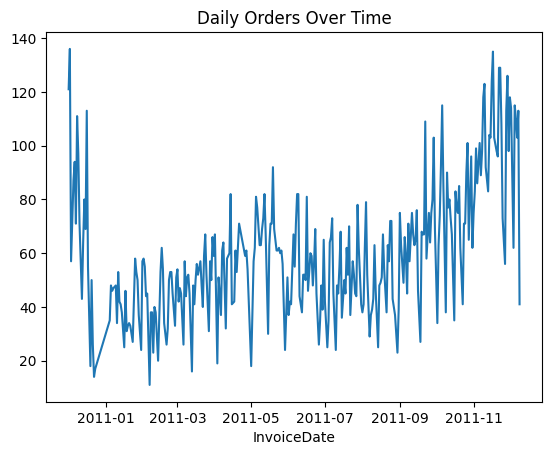

In [33]:
daily_orders = data.groupby(data['InvoiceDate'].dt.date)['InvoiceNo'].nunique()
daily_orders.plot(title='Daily Orders Over Time')

Orders show increasing variability over time, with more frequent spikes.
A clear upward trend is visible, especially from mid-2011 onwards, indicating growing customer engagement or expanding business operations.
The peaks could indicate marketing campaigns, holiday shopping trends, or new product launches.

#### 2.2.4 Sales Trend by Day of the Week

In [34]:
weekday_sales = data.groupby('Weekday')['TotalPrice'].sum().reset_index().sort_values(by='TotalPrice', ascending=False)
fig = px.bar(
    weekday_sales, x='Weekday', y='TotalPrice', 
    title="Sales Trend by Day of the Week",
    labels={'TotalPrice': 'Total Revenue (£)', 'Weekday': 'Day of the Week'},
    color='TotalPrice', color_continuous_scale='reds'
)
fig.show()

Thursday has the highest revenue, followed by Tuesday and Wednesday.
The lowest revenue is on Sunday, suggesting that customers shop less during the weekend.
This insight could help in planning promotions—running discounts earlier in the week may drive higher engagement.

#### 2.2.5 Orders by Time of Day

<Axes: title={'center': 'Orders by Hour'}, xlabel='Hour'>

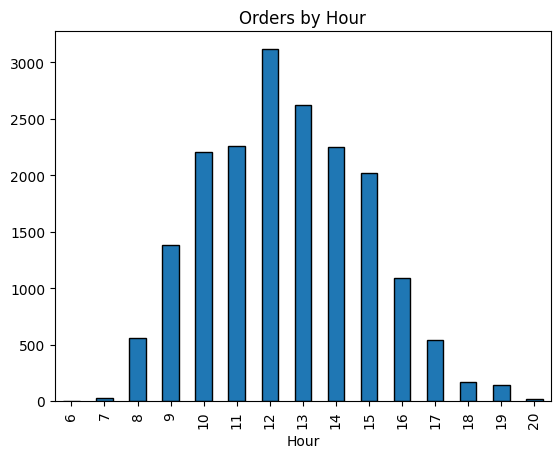

In [35]:
hourly_orders = data.groupby('Hour')['InvoiceNo'].nunique()
hourly_orders.plot(kind='bar', title='Orders by Hour')

Orders peak around midday (12:00 PM), with another high at 1:00 PM.
The number of orders gradually declines after 3:00 PM.
Few transactions occur early in the morning (before 9 AM) and in the evening (after 5 PM).
This aligns with business hours, suggesting customers prefer shopping during working hours, possibly during lunch breaks.

#### 2.2.6 Top 10 Customers by Total Spending

In [36]:
data['CustomerID'] = data['CustomerID'].astype(str)
customer_revenue = data.groupby('CustomerID')['TotalPrice'].sum().nlargest(10).reset_index()
fig = px.bar(
    customer_revenue, x='CustomerID', y='TotalPrice', 
    text='TotalPrice', title="Top 10 Customers by Total Spending",
    labels={'TotalPrice': 'Total Revenue (£)', 'CustomerID': 'Customer ID'},
    color='TotalPrice', color_continuous_scale='reds')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

The top customer (ID 14646) has spent significantly more than the others, followed by 18102 and 17450.
There is a steep drop in total revenue after the top three customers, indicating a possible Pareto-like distribution (where a small percentage of customers contribute a large portion of revenue).
This insight can be used for targeted marketing and customer retention strategies.

#### 2.2.7 Distribution of Average Order Value (AOV)

In [37]:
order_values = data.groupby('InvoiceNo')['TotalPrice'].sum()
fig = px.histogram(order_values, nbins=50, title="Distribution of Average Order Value (AOV)",
                    labels={'value': 'Order Value (£)'}, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

The distribution is highly skewed, with most orders having a low total price.
There are a few extreme outliers where order values are significantly high (potential bulk purchases or business clients).
It might be useful to analyze these outliers separately to understand customer behavior.

#### 2.2.8 Top Returned Products by Frequency

In [38]:
returned_products = data[data['QuantityCancelled'] > 0].groupby('StockCode')['QuantityCancelled'].sum().nlargest(10).reset_index()
fig = px.bar(
    returned_products, x='StockCode', y='QuantityCancelled', 
    text='QuantityCancelled', title="Top 10 Returned Products",
    labels={'QuantityCancelled': 'Number of Returns', 'StockCode': 'Product Code'},
    color='QuantityCancelled', color_continuous_scale='rdbu'
)
fig.show()

Two products (23843 and 23166) have an unusually high number of returns compared to others.
The rest have a significantly lower number of returns, suggesting that only a few products contribute to most of the return volume.
This might indicate quality issues, mismatched customer expectations, or misleading product descriptions.

In [39]:
print(data[data['StockCode']=='23843']['Description'], '\n Number of unique customers:',
      data[data['StockCode']=='23843']['CustomerID'].nunique())

390689    PAPER CRAFT , LITTLE BIRDIE
Name: Description, dtype: object 
 Number of unique customers: 1


This suggests that a single customer is responsible for all returns of this item.
Possible causes:
* A bulk order cancellation.
* A defective batch or incorrect product listing.

In [40]:
print(data[data['StockCode']=='23166']['Description'][:1], '\n Number of unique customers:',
      data[data['StockCode']=='23166']['CustomerID'].nunique())

36375    MEDIUM CERAMIC TOP STORAGE JAR
Name: Description, dtype: object 
 Number of unique customers: 138


The returns are spread across multiple customers, indicating a broader issue.
Possible causes:
* Quality issues (e.g., breakage in transit).
* Mismatch between product expectations and reality.
* High return rate might indicate frequent impulse purchases.

#### **Conclusion from Exploratory Data Analysis (EDA)**  

Our analysis of transaction data reveals several key insights:  

1. **Revenue is heavily concentrated in a few countries and customers.**  
   - The **United Kingdom** dominates total revenue, suggesting it is the primary market.  
   - A small group of **top customers** contributes disproportionately to total spending, following a **Pareto principle** (20% of customers generate 80% of revenue).  

2. **Sales exhibit clear seasonality and time-based trends.**  
   - Revenue peaks in **November and December**, likely due to holiday shopping.  
   - **Daily order trends** show a surge between **10 AM and 2 PM**, suggesting peak shopping hours.  
   - **Thursday is the strongest sales day**, while Sundays see the lowest activity.  

3. **Product returns are concentrated in a few items.**  
   - Two products (23843 and 23166) account for an unusually high volume of **returns**, indicating possible quality or customer expectation mismatches.  

4. **Order values are highly skewed.**  
   - The **majority of orders are low-value**, but a few outliers drive significant revenue.  
   - Understanding these **high-value transactions** could help tailor premium offerings.  

##### **Recommendations**  
- **Customer Retention:** Focus on high-value customers with loyalty programs or personalized offers.  
- **Sales Strategy:** Optimize marketing efforts for peak hours/days and leverage seasonality trends.  
- **Product Improvement:** Investigate frequently returned items for potential quality or description improvements.  
- **Pricing & Promotions:** Offer discounts on low-sales days (e.g., Sunday) and bundle frequently returned items with high-performing products.  

### 2.3. Building an RFM table and searching for RFM outliers

We have reached the most interesting part of our task. We have to form the features on the basis of which we will segment customers.

To do this, let's take a look at a very popular method for analyzing consumer value called RFM.

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

The method involves grouping customers based on the following parameters:
* Recency — how long ago the customer last purchased;
* Frequency — the total number of customer purchases;
* Monetary Value — how much money the customer spent.


The essence of RFM analysis is that we divide all customers into groups depending on how long ago they made their last purchase, how often they bought, and how large the amount of their orders was.

For example, this is how the interpretation of clusters might look for the case of RF segmentation (analysis based on the recency and frequency of the customer's orders):

<img src=https://blog.pushwoosh.com/blog/content/images/2022/11/Pushwoosh-RFM-segments.png>

The main task of marketers is to lead the client to the loyal zone.

We can calculate RFM characteristics for each of the clients in our dataset and, based on them, using clustering methods, build similar client segments linked to our data.

To build an RFM table, we need to group the data by customer IDs and calculate the following aggregated characteristics:

* Recency for the i-th customer is calculated as the difference between the date and time of the last order and the reference point, converted into days:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    where $t_{ij}$ — date and time when the i-th customer made his j-th purchase.

    As a starting point $t_0$ we take a date one day "older" than all our data. This will be December 10, 2011 (in datetime format - '2011-12-10 00:00:00').

* Frequency is calculated as the total number of unique orders made by the i-th customer.
* Monetary Value is calculated as the total amount of money the i-th customer spent on our products (including returns).

In [41]:
# Define reference date for recency calculation
reference_date = pd.Timestamp("2011-12-10 00:00:00")

# Filter out cancelled transactions ('InvoiceNo' starting with 'C' indicates a cancellation)
df = data[~data['InvoiceNo'].astype(str).str.startswith('C')]

# Calculate RFM metrics
rfm = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40


In [42]:
# Boxplots for RFM components
boxes = [px.box(rfm, x=column, color_discrete_sequence=px.colors.sequential.RdBu) for column in rfm.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)


for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)


fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

What's interesting to see here? There are customers with an abnormally large number of orders (more than 100), as well as customers whose total order value exceeds £190,000.

Why is this bad? Outliers can negatively affect the results of clustering methods that are not robust to them, such as the KMeans algorithm, so we would like to get rid of them. However, we also don't want to lose a lot of valuable customer data, so we limit ourselves to the upper limit of the corresponding quantile of 0.95. This way, we will remove data from those customers for whom the Frequency parameter or the Monetary parameter is higher than 95% of customers.

In [43]:
# Compute 95th percentile thresholds
freq_threshold = rfm['Frequency'].quantile(0.95)
monetary_threshold = rfm['Monetary'].quantile(0.95)

# Filter out extreme outliers
rfm_filtered = rfm[(rfm['Frequency'] <= freq_threshold) & (rfm['Monetary'] <= monetary_threshold)]

# Let's see how many customers were removed
removed_customers = rfm.shape[0] - rfm_filtered.shape[0]
print(f"Removed {removed_customers} extreme outliers from the dataset.")

Removed 290 extreme outliers from the dataset.


In [44]:
# Boxplots after filtering
boxes = [px.box(rfm_filtered, x=column, color_discrete_sequence=px.colors.sequential.RdBu) for column in rfm_filtered.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency (after outlier removal)", "Monetary (after outlier removal)"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)


fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_2.html')
fig.show()

That's much nicer!

Now let's look at our data:

In [45]:
fig = px.scatter_3d(
    rfm_filtered, x='Recency', y='Frequency', z='Monetary',
    title="RFM Scatter Plot", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

We can see that it's impossible to distinguish any clusters at the moment so we'll need to turn to dimensionality reduction algorithms

## 3. Modeling and quality assessment of the models

### 3.1. Dimensionality reduction and clustering based on RFM characteristics

To make the clustering results easier to interpret, let's reduce the dimensionality of the original features. 

In order for dimensionality reduction methods to work stably, the data must be standardized. For convenience, we will wrap these data preprocessing steps in a pipeline.

We will preprocess the source data. Based on RFM features, we will cluster the customers of the online gift shop using several different methods.

Then, we will select the optimal number of clusters for the selected methods using the silhouette coefficient, sorting through possible values ​​from 3 to 10 inclusive.

We will select the algorithm with the highest silhouette coefficient, and predict the cluster labels.


At first, let's define a function, that calculates the silhouette score for different kinds of models:

In [46]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def models(rfm):
    """Function to determine the best clustering model based on silhouette score.

    Args:
        rfm (DataFrame): a dataset of RFM metrics

    Returns:
        silhouette_scores (dict): a dictionary with silhouette scores for each model
        best_model (str): the name of the best model
        final_clusterer (object): the best model
    """
    
    # Iterating over k values (3 to 10) for KMeans, Agglomerative Clustering & GMM
    silhouette_scores = {}

    for k in range(3, 11):
        # KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_labels = kmeans.fit_predict(rfm)
        silhouette_scores[f'KMeans_{k}'] = silhouette_score(rfm, kmeans_labels)

        # Agglomerative Clustering
        agglom = AgglomerativeClustering(n_clusters=k)
        agglom_labels = agglom.fit_predict(rfm)
        silhouette_scores[f'Agglo_{k}'] = silhouette_score(rfm, agglom_labels)
    
        # GMM: Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm_labels = gmm.fit_predict(rfm)
        silhouette_scores[f'GMM_{k}'] = silhouette_score(rfm, gmm_labels)

    # DBSCAN: Density-Based Spatial Clustering of Applications with Noise
    # Iterating over epsilon values
    for eps in np.arange(0.1, 3, 0.2):
        dbscan = DBSCAN(eps=eps, min_samples=5)
        dbscan_labels = dbscan.fit_predict(rfm)
        if len(set(dbscan_labels)) > 1:  
            silhouette_scores[f'DBSCAN_{eps}'] = silhouette_score(rfm, dbscan_labels)
    # Selecting best model based on highest silhouette score
    best_model = max(silhouette_scores, key=silhouette_scores.get)
    best_model_name, best_x = best_model.split('_')
 
    # Initialize the final clusterer
    if best_model_name == 'KMeans':
        final_clusterer = KMeans(n_clusters=int(best_x), random_state=42, n_init=10)
    elif best_model_name == 'Agglo':
        final_clusterer = AgglomerativeClustering(n_clusters=int(best_x))
    elif best_model_name == 'GMM':
        final_clusterer = GaussianMixture(n_components=int(best_x), random_state=42)
    else: 
        final_clusterer = DBSCAN(eps=float(best_x), min_samples=5)
    
    return silhouette_scores, best_model, final_clusterer

#### 3.1.1 PCA

First let's try PCA.

PCA (Principal Components Analysis) reduces the number of dimensions in large datasets to principal components that retain most of the original information. It does this by transforming potentially correlated variables into a smaller set of variables, called principal components. It might be the most popular technique for dimensionality reduction with dense data (few zero values).

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Defining a pipeline for preprocessing and dimensionality reduction
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardization
    ('pca', PCA(n_components=2))   # Step 2: Dimensionality Reduction
])
# Applying the pipeline to the RFM data
rfm_pca = pca_pipeline.fit_transform(rfm_filtered)
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PCA1', 'PCA2'])


In [48]:
fig = px.scatter(
    rfm_pca_df, x='PCA1', y='PCA2',
    title="RFM PCA Scatter Plot", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Well that is just no good;) There is no point in continuing with the clustering using PCA. It's time to try tSNE!

#### 3.1.2 t-SNE

tSNE (t-distributed Stochastic Neighbor Embedding) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map.

In [49]:
from sklearn.manifold import TSNE

# Standardizing the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_filtered)

# Applying t-SNE to the RFM data
tsne = TSNE(n_components=2, random_state=42)
rfm_tsne = tsne.fit_transform(rfm_scaled)
rfm_tsne_df = pd.DataFrame(rfm_tsne, columns=['TSNE1', 'TSNE2'])

fig = px.scatter(
    rfm_tsne_df, x='TSNE1', y='TSNE2',
    title="RFM t-SNE Scatter Plot", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

That's much better! Now we can clearly see the clusters and can finally continue with the modeling

In [50]:
# Calculating silhouette scores, best model and final clusterer 
silhouette_scores, best_model, final_clusterer = models(rfm_tsne)

# Fit and predict using the best model
rfm_tsne_df['Cluster'] = final_clusterer.fit_predict(rfm_tsne)

# Print out the best model
print(f"The Best Clustering Algorithm is {best_model} with Silhouette Score: {silhouette_scores[best_model]:.4f}")

The Best Clustering Algorithm is KMeans_10 with Silhouette Score: 0.4780


In [51]:
fig = px.scatter(
    rfm_tsne_df, x='TSNE1', y='TSNE2', color='Cluster',
    title=f"RFM t-SNE Scatter Plot with Clusters using {best_model} (Silhouette Score: {silhouette_scores[best_model]:.4f})", 
    color_continuous_scale=px.colors.qualitative.Set1)
fig.show()

Hmm, the silhouette score doesn't look very good. The score in the range from 0.25 to 0.5 usually means that clustering has some structure, but there is also significant overlap. Maybe we should try some other methods!

#### 3.1.3 UMAP

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. 

In [52]:
import umap

umap_model = umap.UMAP(min_dist=0.001, n_components=2, random_state=42)
rfm_umap = umap_model.fit_transform(rfm_scaled)

# UMAP Scatter Plot
rfm_umap_df = pd.DataFrame(rfm_umap, columns=['UMAP1', 'UMAP2'])

fig = px.scatter(
    rfm_umap_df, x='UMAP1', y='UMAP2',
    title="RFM UMAP Scatter Plot", color_discrete_sequence=px.colors.sequential.RdBu
)
fig.show()

In [53]:
# Calculating silhouette scores, best model and final clusterer
silhouette_scores, best_model, final_clusterer = models(rfm_umap)
# Fit and predict using the best model
rfm_umap_df['Cluster'] = final_clusterer.fit_predict(rfm_umap)

# Plotting the UMAP Scatter Plot 
fig = px.scatter(
    rfm_umap_df, x='UMAP1', y='UMAP2', color=rfm_umap_df['Cluster'].astype(str),
    title=f"RFM UMAP Scatter Plot with Clusters using {best_model} (Silhouette Score: {silhouette_scores[best_model]:.4f})",
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.show()

print(f"The Best Clustering Algorithm is {best_model} with Silhouette Score: {silhouette_scores[best_model]:.4f}")

The Best Clustering Algorithm is Agglo_6 with Silhouette Score: 0.5897


A silhouette score of 0.5897! That's a significant leap from 0.4780! It  also means that the clusters are reasonably separated, but do contain some overlap. Let's see if we can increase the score using other methods

In [54]:
from sklearn.ensemble import IsolationForest

# Let's clean out our data a little bit more
# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.015, random_state=42)
outlier_labels = iso_forest.fit_predict(rfm_scaled)

# Keep only non-outliers (label = 1)
rfm_clean = rfm_scaled[outlier_labels == 1]

umap_model = umap.UMAP(min_dist=0.001, n_components=2, random_state=42)
rfm_umap_clean = umap_model.fit_transform(rfm_clean)

rfm_umap_clean_df = pd.DataFrame(rfm_umap_clean, columns=['UMAP1', 'UMAP2'])
# Calculating silhouette scores, best model and final clusterer
silhouette_scores, best_model, final_clusterer = models(rfm_umap_clean)
# Fit and predict using the best model
rfm_umap_clean_df['Cluster'] = final_clusterer.fit_predict(rfm_umap_clean)

# Plotting the UMAP Scatter Plot 
fig = px.scatter(
    rfm_umap_clean_df, x='UMAP1', y='UMAP2', color=rfm_umap_clean_df['Cluster'].astype(str),
    title=f"RFM UMAP Scatter Plot with Clusters using {best_model} (Silhouette Score: {silhouette_scores[best_model]:.4f})",
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.show()

print(f"The Best Clustering Algorithm is {best_model} with Silhouette Score: {silhouette_scores[best_model]:.4f}")

The Best Clustering Algorithm is KMeans_5 with Silhouette Score: 0.6029


Well look at that! We managed to increase the silhouette score by 0.132 to practically >0.6! That's great! You can choose whatever method you like best depending on what is more important in your particular case: the number of clusters or the silhouette score

### 3.2. Interpreting the clustering results

Let's move on to interpreting the obtained clusters.

#### 3.2.1. Visualization of clusters

In [55]:
rfm_clean = pd.DataFrame(rfm_clean, columns=['Recency', 'Frequency', 'Monetary'])
rfm_clean['Cluster'] = final_clusterer.labels_

# 3D Scatter Plot
fig = px.scatter_3d(rfm_clean, x='Recency', y='Frequency', z='Monetary',
                     color=rfm_clean['Cluster'].astype(str),
                     title="3D clusters' visualization (RFM-analysis)",
                     opacity=0.8, color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()


#### 3.2.2. Building a cluster profile

Next, we will create a so-called cluster profile.

To do this, we will group the RFM table by the resulting clusters and calculate the average for each of the features.

To make the results easier to interpret, we will use a **Radar Chart** (polar diagram, or spider web diagram). This is a graphical representation of the values ​​of several equivalent categories in the form of a spider web.

Radar Chart is often used to determine the profile of clusters. At the ends of the web, axes are plotted corresponding to the features that describe the objects. On each axis, for each cluster, the average values ​​of the corresponding characteristics are plotted. By connecting the points along the axes, we obtain a polygon.

An example of a polar diagram for the problem of clustering students by interests:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

In this diagram we see a visualization of the features for one of the clusters. It is clear that students belonging to this cluster are more interested in music and less interested in programming.

The main condition for using a polar diagram is that all features must be brought to a single scale using normalization, where 1 will mean the maximum and 0 will mean the minimum.

In [56]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Function for visualizing cluster profile as a polar diagram.

    Args:
        grouped_data (DataFrame): table grouped by cluster numbers with aggregated characteristics of objects.
        n_clusters (int): number of clusters.
    """
    # Normalizing the grouped data by bringing it to a scale of 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Creating a list of features
    features = grouped_data.columns
    # Creating an empty figure
    fig = go.Figure()
    # Visualizing a diagram for each cluster separately
    for i in range(n_clusters):
        # Creating a polar diagram and adding it to the figure
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # radiuse
            theta=features, # serif names
            fill='toself', # filling the polygon with color
            name=f'Cluster {i}', # name - cluster number
        ))
    # Updating the layout of the figure
    fig.update_layout(
        showlegend=True, # display the legend
        autosize=False, # setting the size of the figure
        width=650, # width (in pixels)
        height=650, # height (in pixels)
    )
    # Displaying the figure
    fig.show()

Now we have a handy tool for analyzing cluster profiles. Let's use it to interpret the results obtained in the previous step.

In [57]:
cluster_profile_df = rfm_clean.groupby('Cluster').mean()
plot_cluster_profile(cluster_profile_df, n_clusters=5)

## 5. Conclusion

In this project, customer segmentation for an online store was performed using RFM analysis. Various clustering methods were applied, including K-Means, Gaussian Mixture Model (GMM), Agglomerative Clustering and DBSCAN. The best results were achieved with the K-Means model using 5 clusters, with a Silhouette Score of 0.6029, indicating well-defined boundaries between segments.

**To improve the quality of clustering, the following techniques were applied:** 

* UMAP for dimensionality reduction and revealing hidden patterns,

* Isolation Forest for outlier removal and data cleaning before clustering,

* Cluster visualization using 2D and 3D plots (UMAP and RFM space),

* Radar charts to analyze the characteristics of each segment.

**Identified Customer Segments**

By analyzing the obtained clusters, several key groups were identified:

* Premium customers (high purchase frequency and volume, low recency of last purchase).

* New customers (low purchase frequency and volume, recent activity).

* Potentially loyal customers (moderate purchase volume and frequency, medium recency of last transaction).

* Occasional buyers (low purchase frequency and volume, high recency of last purchase).

* Highly active customers with low spending.

The identified segments can be used for personalized marketing, customer retention strategies, and increasing their LTV.

